In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
laliga = pd.read_csv("laliga21-22players.csv")

In [3]:
laliga['total_passes']

0         0
1      2054
2       585
3         5
4         0
       ... 
486     129
487    1226
488    1815
489    1803
490    1439
Name: total_passes, Length: 491, dtype: int64

In [4]:
laliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   name                       491 non-null    object
 1   nickname                   491 non-null    object
 2   country                    491 non-null    object
 3   team                       491 non-null    object
 4   position                   491 non-null    object
 5   age                        491 non-null    int64 
 6   games_played               491 non-null    int64 
 7   time_played                491 non-null    int64 
 8   goals                      491 non-null    int64 
 9   goal_assists               491 non-null    int64 
 10  headed_goals               491 non-null    int64 
 11  left_foot_goals            491 non-null    int64 
 12  right_foot_goals           491 non-null    int64 
 13  penalties_taken            491 non-null    int64 
 14  penalty_go

In [5]:
laliga.isna().count()

name                         491
nickname                     491
country                      491
team                         491
position                     491
age                          491
games_played                 491
time_played                  491
goals                        491
goal_assists                 491
headed_goals                 491
left_foot_goals              491
right_foot_goals             491
penalties_taken              491
penalty_goals                491
penalties_faced              491
penalties_saved              491
total_saves                  491
total_passes                 491
Total_successful_passes      491
total_unsuccessful_passes    491
unsuccessful_dribbles        491
successful_dribbles          491
clean_sheets                 491
total_shots                  491
tackles_lost                 491
tackles_won                  491
yellow_cards                 491
total_red_cards              491
dtype: int64

In [6]:
penalties_taken = laliga['penalties_taken'].sum()
penalties_taken

107

In [7]:
penalty_goals = laliga['penalty_goals'].sum()
penalty_goals

76

In [8]:
penalties_missed = laliga['penalties_taken'].sum() - laliga['penalty_goals'].sum()
penalties_missed

31

***Pie chart for penalties scored vs missed*

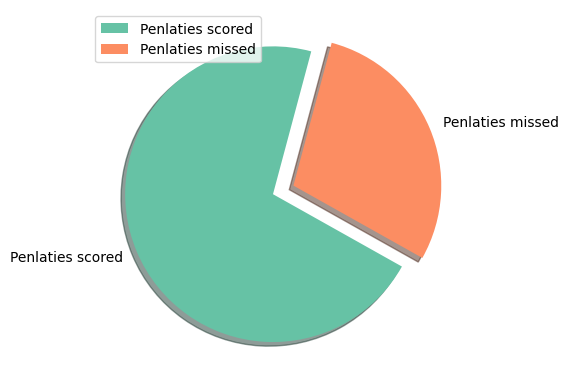

In [9]:
data = [penalty_goals,penalties_missed] 
labels = ["Penlaties scored","Penlaties missed"]
color = sns.color_palette("Set2")
explode = [0,0.15]
plt.pie(data,labels = labels,explode = explode,shadow = True , startangle = 75,colors = color)
plt.legend()
plt.show()

***unique positions,
total forward players,
no of players,
unique nationality,
clubs with max goals,
clubs with max players,
clubs with least players,
clubs with max goals concede,
clubs average age,
clubs playing with most underage plyers,
player with most goals,
player with most assists,
player with most yellow cards,
plyer with  most redcards,
goalkepper with most clean sheets,
goalkepper with most saves,
goalkepper with having better penalty saves percentage,
player with most dribbles in a season,
defenders with most successful tackles,
goals per match by top 10 players***

In [10]:
np.size(laliga['position'].unique())

4

In [11]:
laliga['position'].unique()

array(['Defender', 'Forward', 'Goalkeeper', 'Midfielder'], dtype=object)

Text(0.5, 1.0, 'no of players in a particular position')

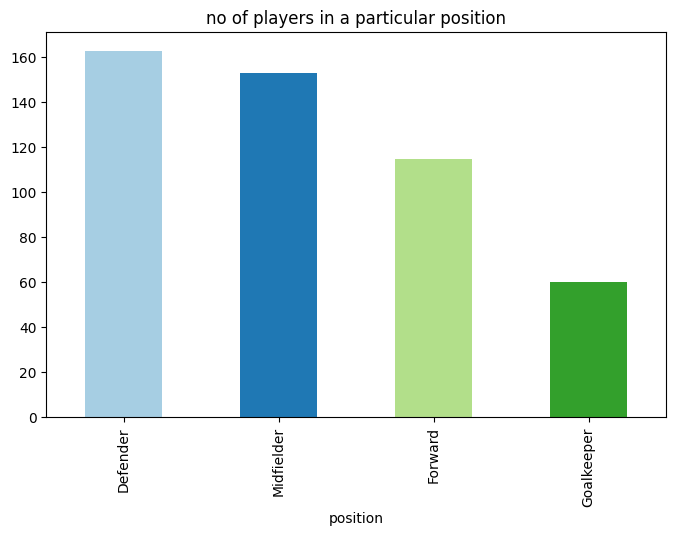

In [12]:
player_position = laliga.groupby('position').size().sort_values(ascending=False)
color = sns.color_palette("Paired")
player_position.plot(kind="bar",figsize = (8,5),color = color)
plt.title("no of players in a particular position")

In [13]:
laliga['country'].unique()

array(['ES', 'FR', 'DK', 'BR', 'CF', 'AR', 'MX', 'SI', 'UY', 'PT', 'MZ',
       'HR', 'ME', 'BE', 'RS', 'AO', 'HN', 'GQ', 'RO', 'MA', 'PY', 'CL',
       'AM', 'NL', 'DE', 'GA', 'US', 'TG', 'TR', 'CZ', 'IE', 'CO', 'SN',
       'VE', 'AL', 'CM', 'MK', 'GE', 'MQ', 'SE', 'CR', 'GH', 'PE', 'CI',
       'UA', 'AT', 'GB-WLS', 'DO', 'NO', 'AU', 'RU', 'GP', 'CH', 'GN',
       'DZ', 'AD', 'EC', 'NG'], dtype=object)

In [14]:
np.size(laliga['country'].unique())

58

<AxesSubplot: title={'center': 'Top 10 countries having most no of players participated in laliga'}, xlabel='country'>

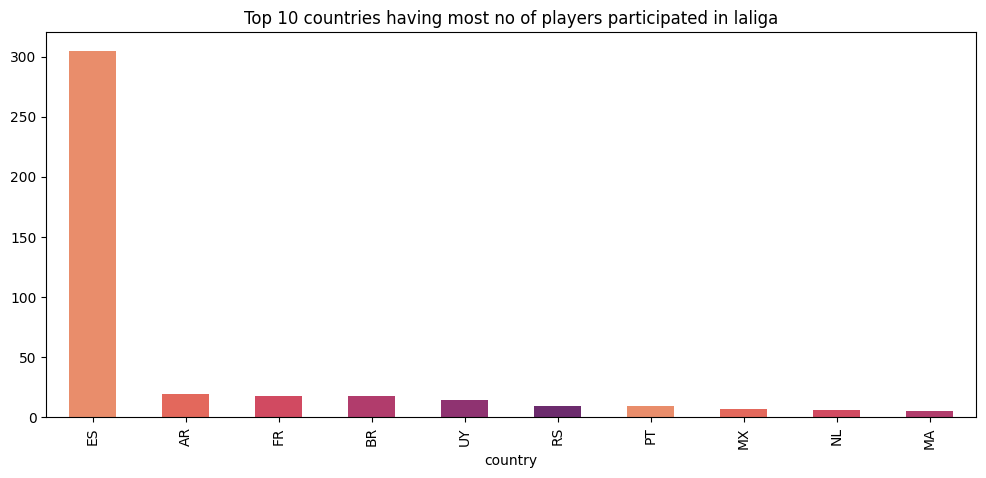

In [15]:
nations = laliga.groupby('country').size().sort_values(ascending=False)
color = sns.color_palette("flare")
plt.title("Top 10 countries having most no of players participated in laliga")
nations.head(10).plot(kind="bar",figsize =(12,5),color = color)

In [16]:
laliga['team'].unique()

array(['Athletic Club', 'AtlÃ©tico de Madrid', 'CA Osasuna', 'CÃ¡diz CF',
       'FC Barcelona', 'Getafe CF', 'Granada CF', 'Levante UD',
       'RC Celta', 'Real Betis', 'Real Madrid', 'Real Sociedad',
       'Sevilla FC', 'Valencia CF', 'Villarreal CF'], dtype=object)

In [17]:
np.size(laliga['team'].unique())

15

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'FC Barcelona'),
  Text(1, 0, 'Levante UD'),
  Text(2, 0, 'Valencia CF'),
  Text(3, 0, 'Sevilla FC'),
  Text(4, 0, 'Real Madrid'),
  Text(5, 0, 'Granada CF'),
  Text(6, 0, 'AtlÃ©tico de Madrid'),
  Text(7, 0, 'RC Celta'),
  Text(8, 0, 'Real Betis'),
  Text(9, 0, 'Villarreal CF'),
  Text(10, 0, 'CÃ¡diz CF'),
  Text(11, 0, 'Athletic Club'),
  Text(12, 0, 'CA Osasuna'),
  Text(13, 0, 'Getafe CF'),
  Text(14, 0, 'Real Sociedad')])

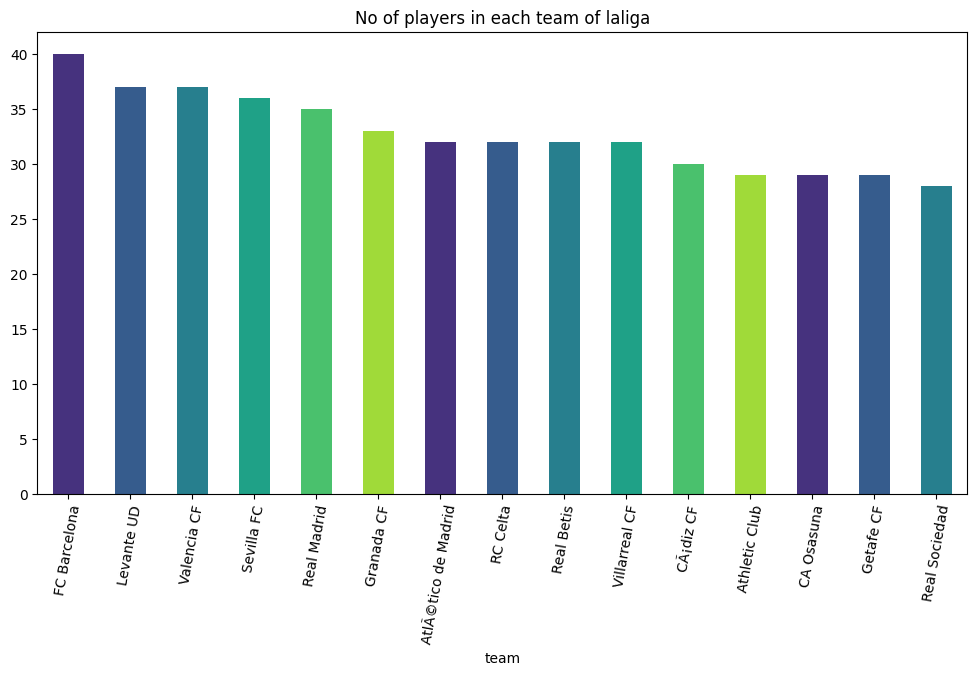

In [18]:
club_players = laliga.groupby('team').size().sort_values(ascending=False)
color = sns.color_palette("viridis")
club_players.plot(kind="bar",figsize=(12,6),color=color)
plt.title("No of players in each team of laliga")
plt.xticks(rotation=80)

In [19]:
laliga.groupby("team").size().sort_values()

team
Real Sociedad          28
Athletic Club          29
CA Osasuna             29
Getafe CF              29
CÃ¡diz CF              30
AtlÃ©tico de Madrid    32
RC Celta               32
Real Betis             32
Villarreal CF          32
Granada CF             33
Real Madrid            35
Sevilla FC             36
Levante UD             37
Valencia CF            37
FC Barcelona           40
dtype: int64

In [20]:
club_players.max()

40

In [21]:
club_players.min()

28

In [22]:
under20 = laliga[laliga['age'] <= 20]
between20to25 = laliga[(laliga['age'] > 20) & (laliga['age'] <= 25) ]
between25to30 = laliga[(laliga['age'] > 25) & (laliga['age'] <= 30) ] 
above30 = laliga[laliga['age'] > 30]                                           

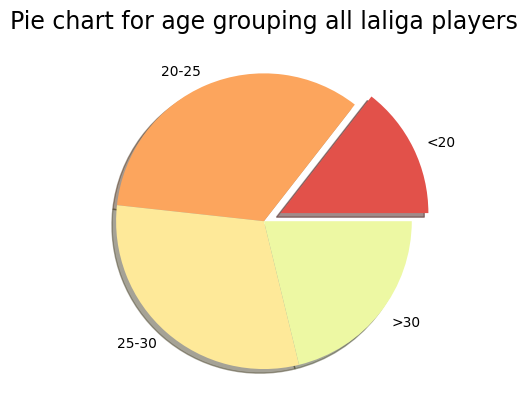

In [23]:
players_age = np.array([under20['nickname'].count(),between20to25['nickname'].count(),between25to30['nickname'].count(),above30['nickname'].count()])
color = sns.color_palette("Spectral")
explode = [0.125,0,0,0]
labels = ["<20","20-25","25-30",">30"]
plt.pie(players_age,labels = labels,explode = explode,colors = color,shadow=True,radius = 1)
plt.title("Pie chart for age grouping all laliga players",fontsize = 17)
plt.show()

<AxesSubplot: >

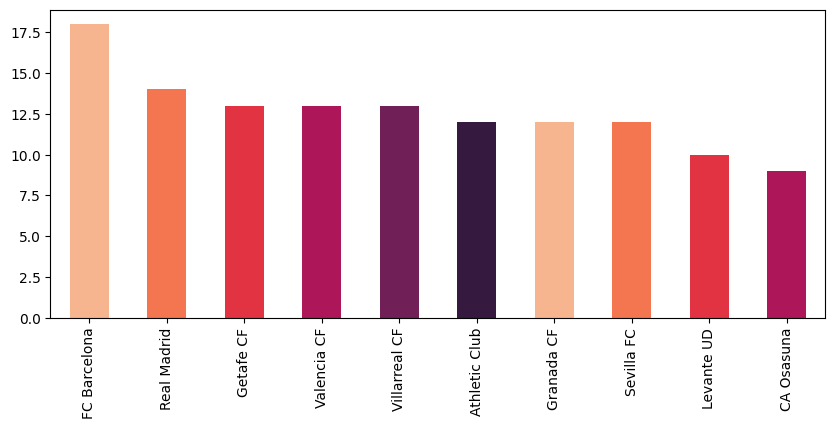

In [24]:
between20to25 = laliga[(laliga['age']>20) & (laliga['age'] <= 25) ]
between20to25['team'].value_counts().head(10).plot(kind="bar",figsize=(10,4),color = sns.color_palette("rocket_r") )

<AxesSubplot: >

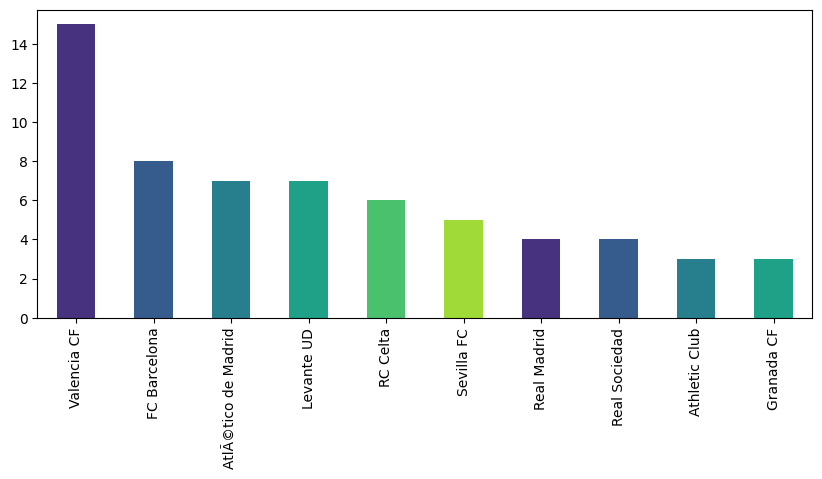

In [25]:
under20 = laliga[laliga['age'] <= 20]
under20['team'].value_counts().head(10).plot(kind="bar",figsize=(10,4),color = sns.color_palette("viridis") )